<a href="https://colab.research.google.com/github/seoyeon7/ML/blob/main/Linear%20regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import math
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [17]:
data = pd.read_csv('/content/iris.data',header=None, names=['sepal_len','sepal_width','petal_len','petal_width','class'])

In [18]:
index=data[['sepal_len','sepal_width','petal_len','petal_width']]
target = data['class']

In [19]:
data = data.sample(frac=1).reset_index(drop=True)

In [20]:
def split(dataset):
    train_size = int(data.shape[0]*0.80)
    test_size = int(data.shape[0]*0.20)
    
    traindata = dataset.iloc[test_size:].reset_index(drop=True)
    testdata = dataset.iloc[:test_size].reset_index(drop=True)
    return traindata,testdata

train = split(data)[0]
test = split(data)[1]

In [21]:
train.head

<bound method NDFrame.head of      sepal_len  sepal_width  petal_len  petal_width            class
0          6.0          2.2        5.0          1.5   Iris-virginica
1          4.8          3.4        1.9          0.2      Iris-setosa
2          5.8          2.7        3.9          1.2  Iris-versicolor
3          6.4          3.2        4.5          1.5  Iris-versicolor
4          5.6          3.0        4.5          1.5  Iris-versicolor
..         ...          ...        ...          ...              ...
115        5.8          2.6        4.0          1.2  Iris-versicolor
116        4.9          2.4        3.3          1.0  Iris-versicolor
117        5.1          3.3        1.7          0.5      Iris-setosa
118        7.2          3.0        5.8          1.6   Iris-virginica
119        6.5          3.0        5.5          1.8   Iris-virginica

[120 rows x 5 columns]>

<function matplotlib.pyplot.show>

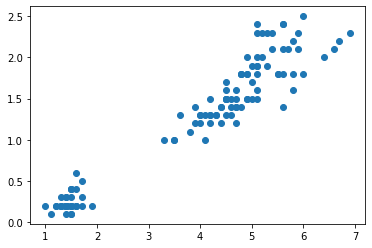

In [22]:
#4개의 feature 중 petal_len, petal_width 사용

p_len=np.array(train['petal_len'])
p_width=np.array(train['petal_width'])
plt.scatter(p_len,p_width)
plt.show

In [39]:
def CostFunction1(X,y,a,b):
    cost=0
    for i in range(len(y)):
        cost+=(a*X[i]+b-y[i])**2
    return cost/2/len(y)

In [40]:
def CostFunction2(X,y,a,b):
    return sum((X*a+b-y)**2)/2/len(y)

In [45]:
print(CostFunction1(p_len,p_width,1,10))
print(CostFunction2(p_len,p_width,1,10))

TypeError: ignored